# Constraining orientation of 3D shapes

Extending the movement bounds/constrains sketch with constrained orientations too.

## Vector maths

Minimise dependencies

In [1]:
import math

def vec_add(a, b):
  return tuple([c_a + c_b for c_a, c_b in zip(a, b)])

def vec_mul(a, m):
  return tuple([m * c for c in a])

def vec_dot(a, b):
  return sum([c_a * c_b for c_a, c_b in zip(a, b)])

def vec_mag(a):
  return math.sqrt(vec_dot(a, a))

def vec_cross(a, b):
  return (a[1] * b[2] - a[2] * b[1],
          a[2] * b[0] - a[0] * b[2],
          a[0] * b[1] - a[1] * b[0])
  
def vec_rotate_axis(a, axis, theta):
  c_n = vec_mul(axis, vec_dot(a, axis))
  nca = vec_cross(axis, a)
  c_c = vec_cross(vec_mul(nca, math.cos(theta)), axis)
  c_s = vec_mul(nca, math.sin(theta))
  return vec_add(c_n, vec_add(c_c, c_s))

## Define 3D shape of an object


In [2]:
class Box():

  def __init__(self, min, max):
    self.min = min
    self.max = max

  def vertexes(self):
    lim = [self.min, self.max]
    return [(i[0], j[1], k[2]) for i in lim for j in lim for k in lim]

In [3]:
box = Box((-0.1, -0.2, -0.3), (0.1, 0.2, 0.3))

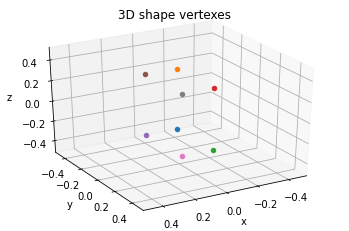

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def draw_vertexes(vs, title='3D shape vertexes'):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlim3d(-0.5, 0.5)
  ax.set_ylim3d(-0.5, 0.5)
  ax.set_zlim3d(-0.5, 0.5)
  for v in vs:
    ax.scatter(v[0], v[1], v[2])
  ax.view_init(30, 60)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.title(title)
  plt.draw()

draw_vertexes(box.vertexes())

## Define orientation constraints

In this instance, we find a minimal rotation to align a direction in the frame of the shape to a direction in the world frame. We return the axis (normal vector) and angle of rotation (radians) for an axis-angle rotation transformation.

In [5]:
def rotation_to_constrain_orientation(shape_dir, world_dir):
  axis = vec_cross(shape_dir, world_dir)
  mag = vec_mag(axis)
  return vec_mul(axis, 1 / mag), math.asin(mag)

def vertexes_rotate_axis(vs, axis, theta):
  return [vec_rotate_axis(v, axis, theta) for v in vs]

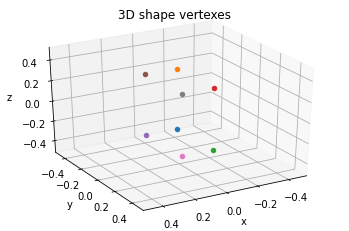

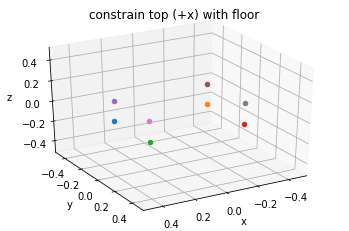

In [6]:
top = (1, 0, 0)
floor_normal = (0, 0, 1)

axis_floor, theta_floor = rotation_to_constrain_orientation(top, floor_normal)
vs_rot_floor = vertexes_rotate_axis(box.vertexes(), axis_floor, theta_floor)
draw_vertexes(box.vertexes())
draw_vertexes(vs_rot_floor, title='constrain top (+x) with floor')

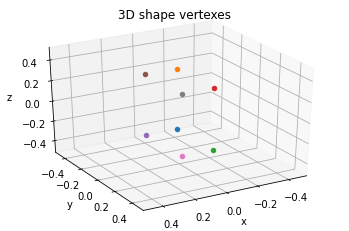

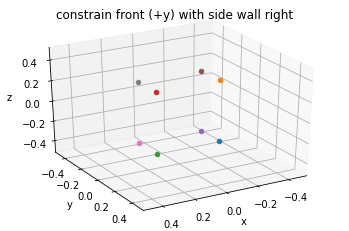

In [7]:
front = (0, 1, 0)
side_wall_right_normal = (1, 0, 0)

axis_swr, theta_swr = rotation_to_constrain_orientation(front, side_wall_right_normal)
vs_rot_swr = vertexes_rotate_axis(box.vertexes(), axis_swr, theta_swr)
draw_vertexes(box.vertexes())
draw_vertexes(vs_rot_swr, title='constrain front (+y) with side wall right')

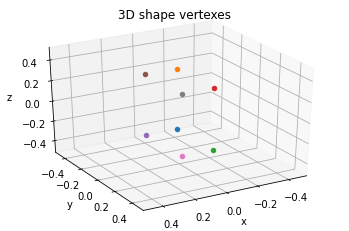

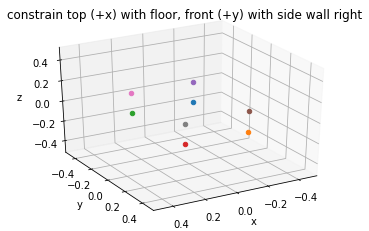

In [8]:
vs_rot_comb = vertexes_rotate_axis(vs_rot_floor, axis_swr, theta_swr)
draw_vertexes(box.vertexes())
draw_vertexes(vs_rot_comb, title='constrain top (+x) with floor, front (+y) with side wall right')